**Master PyTorch Conv2d: Filters, Edge Detection, LazyConv2d & Output Size Formula**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

nn.Conv2d()

In [ ]:
x=torch.arange(25).float().reshape(1,1,5,5)
x

tensor([[[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]])

In [ ]:
conv=nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    stride=2,
    padding=0,
    bias=False
    )

In [ ]:
conv.weight.data

tensor([[[[-0.0535,  0.0434, -0.2202],
          [ 0.2899, -0.0306, -0.1179],
          [ 0.0309, -0.1431, -0.1431]]]])

In [ ]:
conv.weight.data=torch.ones_like(conv.weight.data)
conv.weight.data

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])

In [ ]:
output=conv(x)
x[0,0]

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

In [ ]:
output[0]

tensor([[[ 54.,  72.],
         [144., 162.]]], grad_fn=<SelectBackward0>)

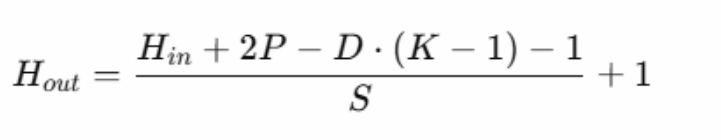

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving mnistdata1.jpg to mnistdata1.jpg


In [ ]:
uploaded.keys()

dict_keys(['mnistdata1.jpg'])

In [ ]:
image_path=list(uploaded.keys())[0]

In [ ]:
image_path

'mnistdata1.jpg'

In [ ]:
img=Image.open(image_path).convert('L')
transform=transforms.ToTensor()
img_tensor=transform(img)

In [ ]:
images=[img_tensor]

In [ ]:
a=torch.tensor([1,2,3])
b=torch.tensor([4,5,6])
a,b

(tensor([1, 2, 3]), tensor([4, 5, 6]))

In [ ]:
a.shape

torch.Size([3])

In [ ]:
c=a.unsqueeze(0)
c.shape


torch.Size([1, 3])

In [ ]:
c.squeeze(0).shape

torch.Size([3])

In [ ]:
torch.cat([a,b],dim=0)

tensor([1, 2, 3, 4, 5, 6])

In [ ]:
def plot_filter(images,filter):
  images=torch.cat([i.unsqueeze(0) for i in images],dim=0).cpu()
  filter=(torch.FloatTensor(filter)).unsqueeze(0).unsqueeze(0).cpu()
  n_images=images.shape[0]
  filtered_images=F.conv2d(images,filter)
  fig=plt.figure(figsize=(20,5))
  for i in range(n_images):
    ax=fig.add_subplot(2,n_images,i+1)
    ax.imshow(images[i].squeeze(0),cmap='bone')
    ax.set_title('orginal')
    ax.axis('off')

    image=filtered_images[i].squeeze(0)
    ax=fig.add_subplot(2,n_images,n_images+i+1)
    ax.imshow(image,cmap='bone')
    ax.set_title('filtered')
    ax.axis('off')







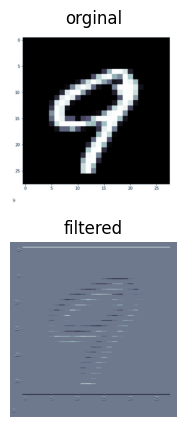

In [ ]:
top_edge_filter=[[1  ,1, 1],
                 [0,  0, 0],
                 [-1,-1,-1]]
plot_filter(images,top_edge_filter)

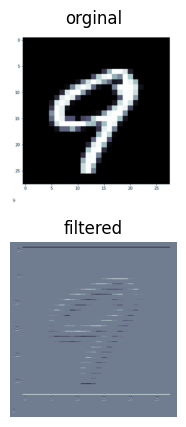

In [ ]:
bottom_edge_filter=[[-1  ,-1, -1],
                 [0,  0, 0],
                 [1,1,1]]
plot_filter(images,bottom_edge_filter)

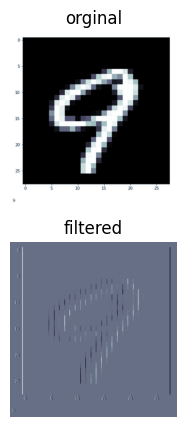

In [ ]:
left_edge_filter=[[1,0,-1],
                  [1,0,-1],
                  [1,0,-1]]
plot_filter(images,left_edge_filter)

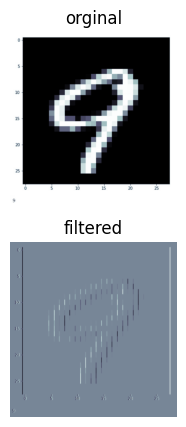

In [ ]:
right_edge_filter=[[-1,0,1],
                  [-1,0,1],
                  [-1,0,1]]
plot_filter(images,right_edge_filter)

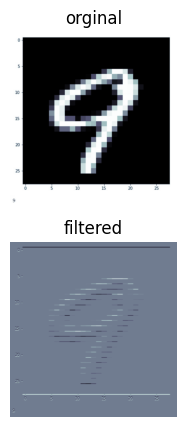

In [ ]:
horizontal_filter = [[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]]

plot_filter(images, horizontal_filter)

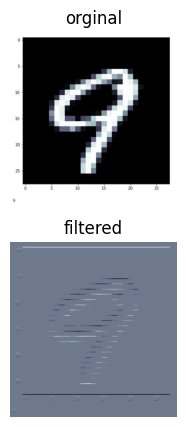

In [ ]:
horizontal_filter = [[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]]

plot_filter(images, horizontal_filter)

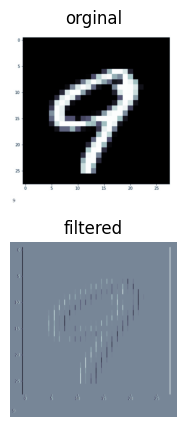

In [ ]:
vertical_filter = [[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]

plot_filter(images, vertical_filter)

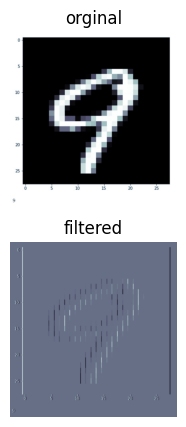

In [ ]:
vertical_filter = [[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]]

plot_filter(images, vertical_filter)

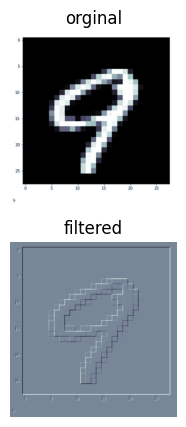

In [ ]:
diagonal_filter = [[-2, -1, 0],
                   [-1,  0, 1],
                   [ 0,  1, 2]]

plot_filter(images, diagonal_filter)

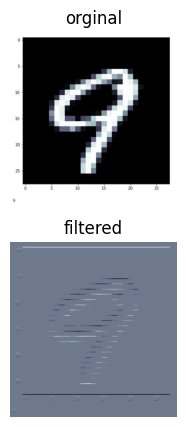

In [ ]:
sobel_top_filter = [[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]]
plot_filter(images, sobel_top_filter)

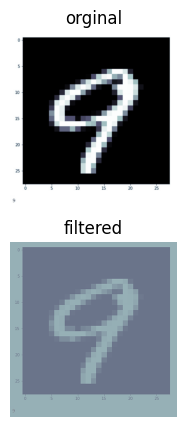

In [ ]:
sharpen_filter = [[ 0, -1,  0],
                  [-1,  5, -1],
                  [ 0, -1,  0]]
plot_filter(images, sharpen_filter)

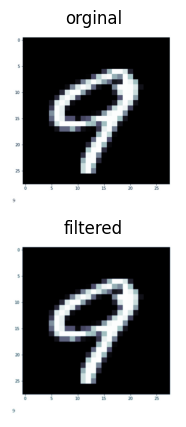

In [ ]:
box_blur_filter = [[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]]
plot_filter(images, box_blur_filter)

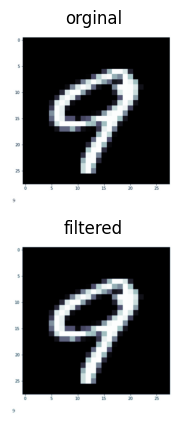

In [ ]:
gaussian_blur_filter = [[1/16, 2/16, 1/16],
                        [2/16, 4/16, 2/16],
                        [1/16, 2/16, 1/16]]
plot_filter(images, gaussian_blur_filter)

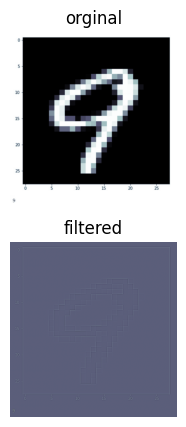

In [ ]:
laplacian_filter = [[ 0,  1, 0],
                    [ 1, -4, 1],
                    [ 0,  1, 0]]
plot_filter(images, laplacian_filter)

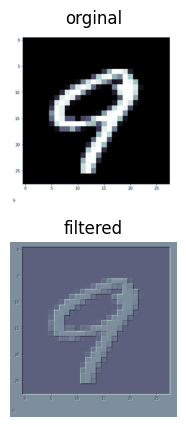

In [ ]:
emboss_filter = [[-2, -1,  0],
                 [-1,  1,  1],
                 [ 0,  1,  2]]
plot_filter(images, emboss_filter)

In [ ]:
x=torch.arange(48).float().reshape(1,3,4,4)
x

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[16., 17., 18., 19.],
          [20., 21., 22., 23.],
          [24., 25., 26., 27.],
          [28., 29., 30., 31.]],

         [[32., 33., 34., 35.],
          [36., 37., 38., 39.],
          [40., 41., 42., 43.],
          [44., 45., 46., 47.]]]])

In [ ]:
conv=nn.Conv2d(out_channels=2,kernel_size=2,stride=1,padding=0,bias=False)

TypeError: Conv2d.__init__() missing 1 required positional argument: 'in_channels'

In [ ]:
x.shape

torch.Size([1, 3, 4, 4])

In [ ]:
output=conv(x)
output.shape

torch.Size([1, 2, 3, 3])

In [ ]:
conv=nn.Conv2d(in_channels=3,out_channels=2,kernel_size=2,stride=1,padding=0,bias=False)

In [ ]:
lazy_conv=nn.LazyConv2d(out_channels=4,kernel_size=3,stride=1,padding=1)
lazy_conv(x).shape


torch.Size([1, 4, 4, 4])

In [ ]:
lazy_conv.in_channels

3